In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
pd.read_csv("NKE-3.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-27,21.495001,21.520000,21.375000,21.457500,16.876690,6373600
1,2010-12-28,21.559999,21.695000,21.527500,21.582500,16.975006,8459600
2,2010-12-29,21.635000,21.635000,21.312500,21.317499,16.766581,6960400
3,2010-12-30,21.325001,21.530001,21.280001,21.440001,16.862930,5910000
4,2010-12-31,21.350000,21.459999,21.280001,21.355000,16.796070,5796000
5,2011-01-03,21.457500,21.645000,21.315001,21.522499,16.927809,8566400
6,2011-01-04,21.400000,21.437500,20.937500,20.992500,16.510962,13797600
7,2011-01-05,20.912500,21.207500,20.877501,21.129999,16.619110,11598800
8,2011-01-06,21.112499,21.125000,20.889999,20.940001,16.469669,8057200
9,2011-01-07,20.924999,20.987499,20.817499,20.882500,16.424444,8174400


In [5]:
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("NKE-3.csv")
df.head()
df.tail


<bound method NDFrame.tail of             Date        Open        High        Low       Close   Adj Close  \
0     2010-12-27   21.495001   21.520000  21.375000   21.457500   16.876690   
1     2010-12-28   21.559999   21.695000  21.527500   21.582500   16.975006   
2     2010-12-29   21.635000   21.635000  21.312500   21.317499   16.766581   
3     2010-12-30   21.325001   21.530001  21.280001   21.440001   16.862930   
4     2010-12-31   21.350000   21.459999  21.280001   21.355000   16.796070   
5     2011-01-03   21.457500   21.645000  21.315001   21.522499   16.927809   
6     2011-01-04   21.400000   21.437500  20.937500   20.992500   16.510962   
7     2011-01-05   20.912500   21.207500  20.877501   21.129999   16.619110   
8     2011-01-06   21.112499   21.125000  20.889999   20.940001   16.469669   
9     2011-01-07   20.924999   20.987499  20.817499   20.882500   16.424444   
10    2011-01-10   20.812500   21.122499  20.764999   21.042500   16.550291   
11    2011-01-11   21.

In [7]:
print(df.head())
print(df.shape)
print(df.columns)

         Date       Open       High        Low      Close  Adj Close   Volume
0  2010-12-27  21.495001  21.520000  21.375000  21.457500  16.876690  6373600
1  2010-12-28  21.559999  21.695000  21.527500  21.582500  16.975006  8459600
2  2010-12-29  21.635000  21.635000  21.312500  21.317499  16.766581  6960400
3  2010-12-30  21.325001  21.530001  21.280001  21.440001  16.862930  5910000
4  2010-12-31  21.350000  21.459999  21.280001  21.355000  16.796070  5796000
(2265, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


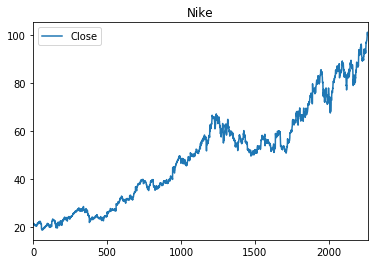

In [8]:
df[['Close']].plot()
plt.title("Nike")
plt.show()


Text(0.5, 1.0, 'Nike Cumulative Returns')

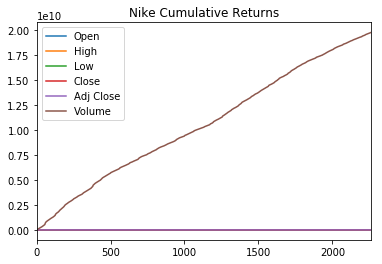

In [9]:
dr = df.cumsum()
dr.plot()
plt.title('Nike Cumulative Returns')

Text(0.5, 1.0, 'Nike Autocorrelation plot')

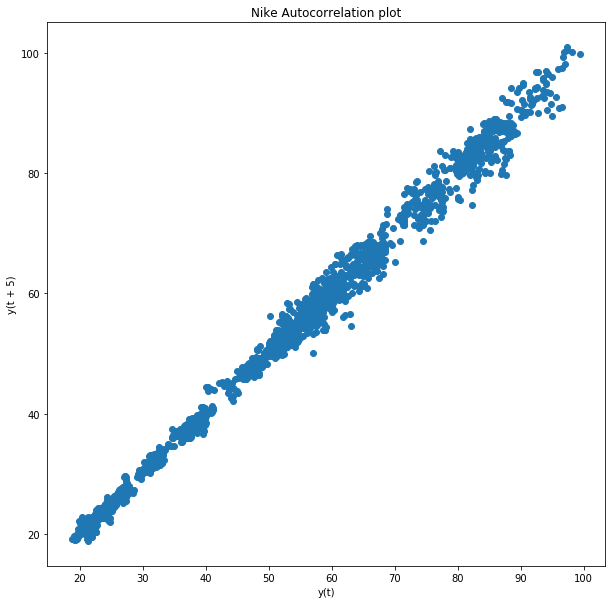

In [10]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Nike Autocorrelation plot')

In [11]:
df['Date'][2264]

'2019-12-24'

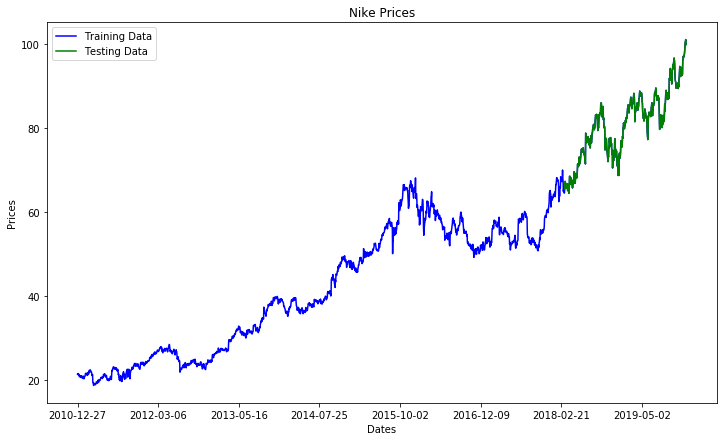

In [12]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Nike Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2264, 300), df['Date'][0:2264:300])
plt.legend()

In [13]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [17]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)


<class 'list'>
Testing Mean Squared Error: 1.375
Symmetric mean absolute percentage error: 11.361


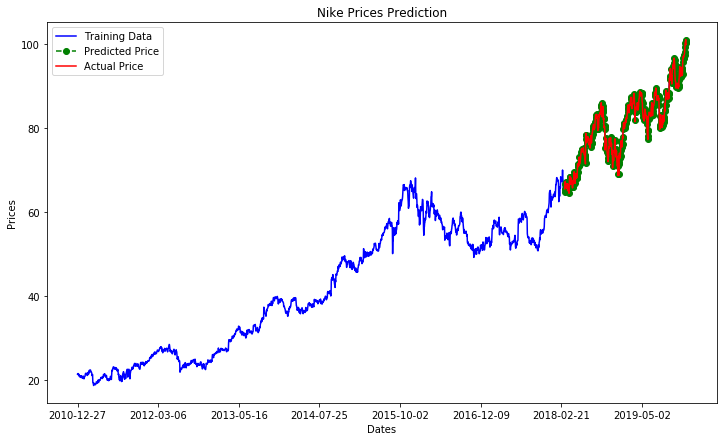

In [18]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Nike Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2264, 300), df['Date'][0:2264:300])
plt.legend()

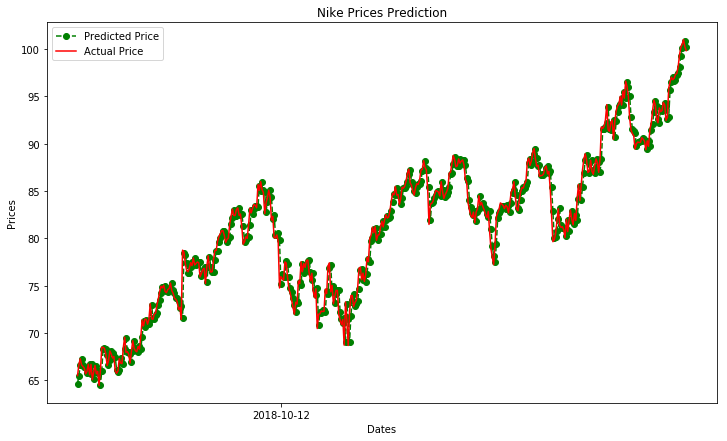

In [19]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1963,2263, 360), df['Date'][1963:2263:360])
plt.title('Nike Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

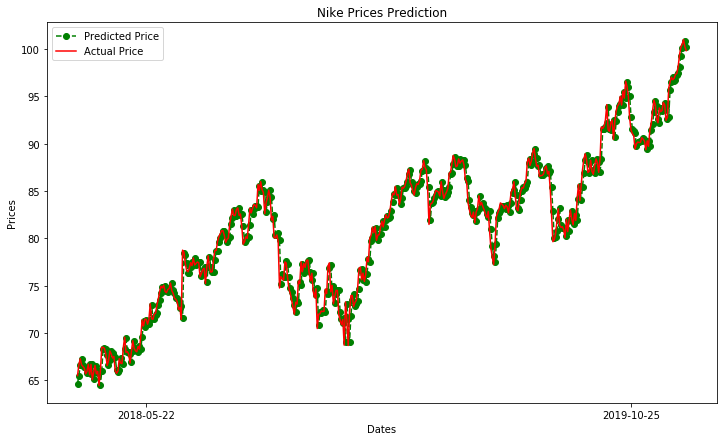

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1863,2263, 360), df['Date'][1863:2263:360])
plt.title('Nike Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

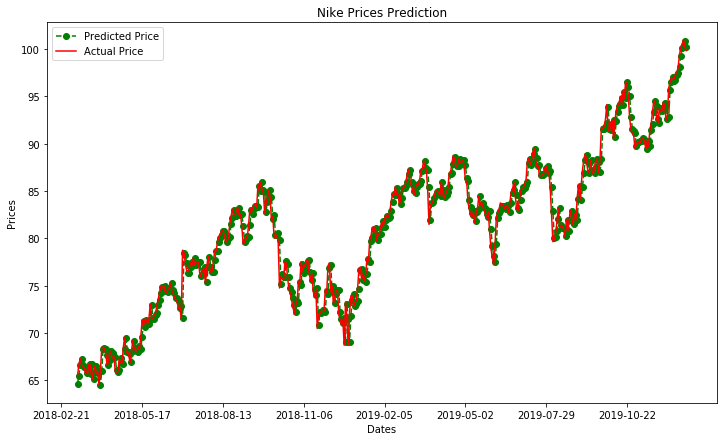

In [21]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1800,2263, 60), df['Date'][1800:2263:60])
plt.title('Nike Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

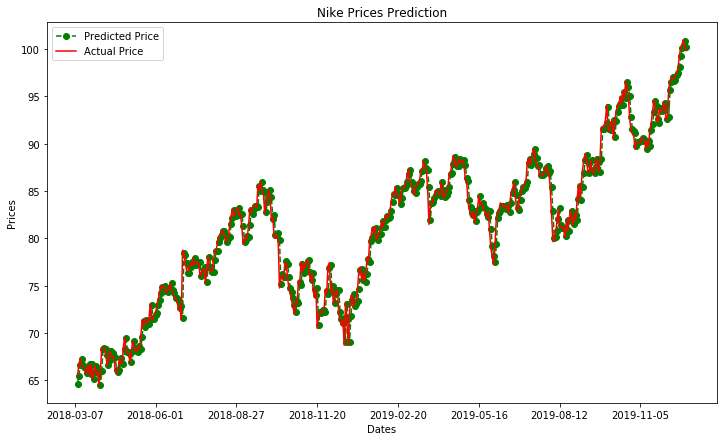

In [22]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1810,2263, 60), df['Date'][1810:2263:60])
plt.title('Nike Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()